In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

# KDOT and KMEANS

In [5]:

def kmeans(df, answers, n_clusters=3, normalize=False):
    n = n_clusters

    if normalize:
        n0mask = ~(np.linalg.norm(answers, axis=1) == 0)
        answers[n0mask] = np.divide(
            answers[n0mask],
            np.reshape(
                np.linalg.norm(answers[n0mask], axis=1),
                (-1, 1)
            )
        )


    result = KMeans(n_clusters=n_clusters).fit(answers)

    for i in range(n):
        g = np.where(result.labels_ == i)
        g_score = np.mean(df.loc[g, "label"])
        print(f"Group {i + 1} score: {g_score}")
    
    return result.labels_


def kdots(df, answers, n_clusters=3, max_iters=100_000):
    n = n_clusters
    answers = np.copy(answers)
    n0mask = ~(np.linalg.norm(answers, axis=1) == 0)
    answers[n0mask] = np.divide(
        answers[n0mask],
        np.reshape(
            np.linalg.norm(answers[n0mask], axis=1),
            (-1, 1)
        )
    )

    n_answers, vec_length = answers.shape

    change = True
    centroids = answers[np.random.choice(n_answers, n, replace=False), :]
    #centroids = np.random.random((n, vec_length))
    labels = np.ones(n_answers) * -1
    new_labels = np.zeros(n_answers)
    answers = answers.T
    iters = 0
    while change and iters < max_iters:
        
        # centroids = np.divide(
        #     centroids,
        #     np.reshape(
        #         np.linalg.norm(centroids, axis=1),
        #         (-1, 1)
        #     )
        # )

        dots = np.dot(centroids, answers)
        new_labels = np.argmax(dots, axis=0)

        change = (new_labels != labels).any()
        labels = new_labels.copy()

        for i in range(n):
            centroids[i, :] = np.mean(answers[:, labels == i], axis=1)

        iters += 1

    for i in range(n):
        g = np.where(labels == i)
        g_score = np.mean(df.loc[g, "label"])
        print(f"Group {i + 1} score: {g_score}")

    return labels
        
# answers = np.random.random((20, 3)) * 10 - 5
# labels = kdots(answers, 3)
# result = KMeans(n_clusters=3).fit(answers)

# fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=100)
# ax[0].scatter(answers[:, 0], answers[:, 1], c=labels)
# ax[1].scatter(answers[:, 0], answers[:, 1], c=result.labels_)
# plt.show()

### Common Crawl kmeans

In [6]:
df = pd.read_json("./data/q_2_k_24.json")
answers = np.load("./data/test_original_vector.npy")
print("Original vector")
_ = kmeans(df, answers, 3)

df = pd.read_json("./data/q_2_k_24.json")
answers = np.load("./data/test_original_matrix.npy")
print()
print("Original matrix")
_ = kmeans(df, answers, 3)

df = pd.read_csv("./data/q_2_k_24_nearest.csv")
answers = np.load("./data/test_nearest_vector.npy")
print()
print("Nearest vector")
_ = kmeans(df, answers, 3)

df = pd.read_csv("./data/q_2_k_24_nearest.csv")
answers = np.load("./data/test_nearest_matrix.npy")
print()
print("Nearest matrix")
_ = kmeans(df, answers, 3)


FileNotFoundError: [Errno 2] No such file or directory: './data/test_original_vector.npy'

In [8]:
answers = np.load("./data/12_cc_vector.npy")
answers.shape

(926, 300)

### Common crawl kdots

In [249]:
df = pd.read_json("./data/q_2_k_24.json")
answers = np.load("./data/test_original_vector.npy")

print("Original vector")
_ = kdots(df, answers, 5)

df = pd.read_json("./data/q_2_k_24.json")
answers = np.load("./data/test_original_matrix.npy")

print()
print("Original matrix")
_ = kdots(df, answers, 5)

df = pd.read_csv("./data/q_2_k_24_nearest.csv")
answers = np.load("./data/test_nearest_vector.npy")

print()
print("Nearest vector")
_ = kdots(df, answers, 5)

df = pd.read_csv("./data/q_2_k_24_nearest.csv")
answers = np.load("./data/test_nearest_matrix.npy")

print()
print("Nearest matrix")
_ = kdots(df, answers, 5)

Original vector
Group 1 score: 0.3793103448275862
Group 2 score: 0.0
Group 3 score: 0.3173076923076923
Group 4 score: 0.20833333333333334
Group 5 score: 0.109375

Original matrix
Group 1 score: 0.0
Group 2 score: 0.3791208791208791
Group 3 score: 0.46226415094339623
Group 4 score: 0.5397727272727273
Group 5 score: 0.26435406698564595

Nearest vector
Group 1 score: 0.34375
Group 2 score: 0.29508196721311475
Group 3 score: 0.2647058823529412
Group 4 score: 0.38823529411764707
Group 5 score: 0.3191823899371069

Nearest matrix
Group 1 score: 0.39156626506024095
Group 2 score: 0.38439306358381503
Group 3 score: 0.2445414847161572
Group 4 score: 0.3678571428571429
Group 5 score: 0.4131944444444444


### Wiki kmeans

In [165]:
df = pd.read_json("./data/q_2_k_24.json")
answers = np.load("./data_wiki/test_original_vector.npy")

print("Original vector")
kmeans(df, answers, 3)


Original vector
Group 1 score: 0.3180147058823529
Group 2 score: 0.3312883435582822
Group 3 score: 0.37574850299401197


In [167]:
df = pd.read_json("./data/q_2_k_24.json")
answers = np.load("./data_wiki/test_original_matrix.npy")

print("Original matrix")
kmeans(df, answers, 3)

Original matrix
Group 1 score: 0.3872549019607843
Group 2 score: 0.584070796460177
Group 3 score: 0.2897111913357401


In [ ]:
df = pd.read_json("./data/q_2_k_24.json")
answers = np.load("./data_wiki/test_.npy")

print("Nearest vector")
kmeans(df, answers, 3)

### Graphs


Original matrix
Group 1 score: 0.2975133214920071
Group 2 score: 0.4316546762589928
Group 3 score: 0.5746268656716418


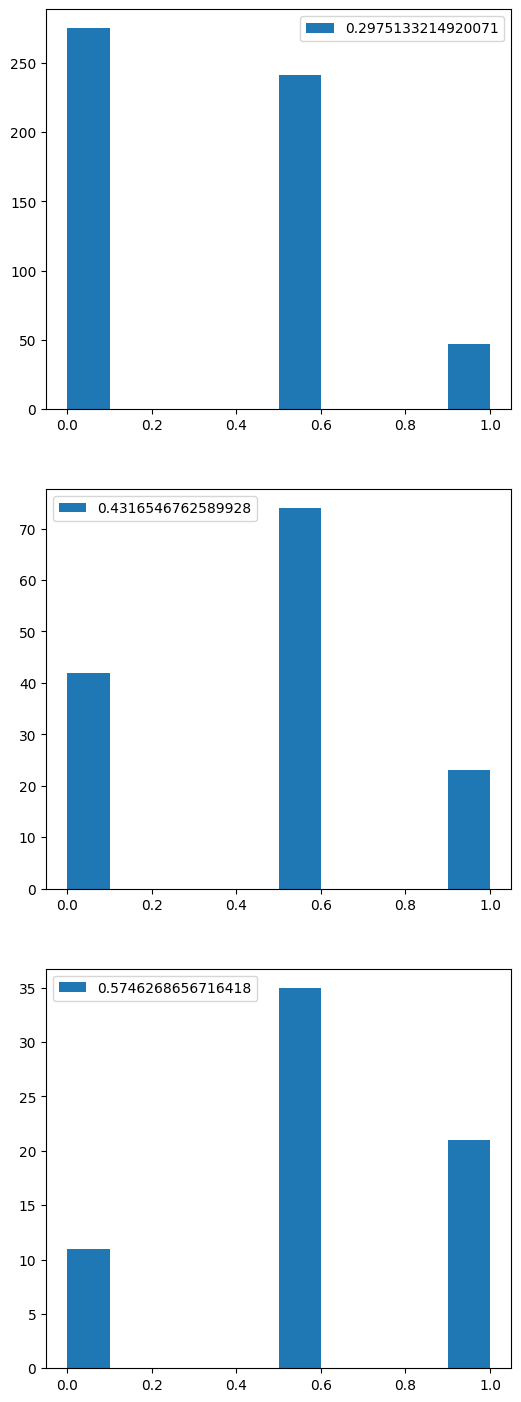

In [4]:
df = pd.read_json("./data/q_2_k_24.json")
answers = np.load("./data/test_original_matrix.npy")
print()
print("Original matrix")
labels = kdots(df, answers, 3)

fig, ax = plt.subplots(3, 1, figsize = (6, 18), dpi = 100)

g = np.where(labels == 0)
subans = df.loc[g, "label"]
ax[0].hist(subans, label=f"{np.mean(subans)}")
ax[0].legend()

g = np.where(labels == 1)
subans = df.loc[g, "label"]
ax[1].hist(subans, label=f"{np.mean(subans)}")
ax[1].legend()

g = np.where(labels == 2)
subans = df.loc[g, "label"]
ax[2].hist(subans, label=f"{np.mean(subans)}")
ax[2].legend()

plt.show()

(array([328.,   0.,   0.,   0.,   0., 350.,   0.,   0.,   0.,  91.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

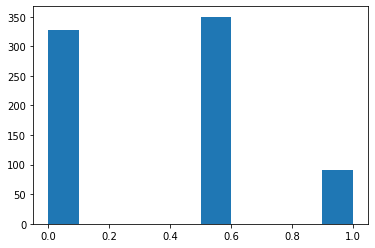

In [5]:
df = pd.read_csv("./data/q_2_k_24_nearest.csv")

plt.hist(df["label"])


In [102]:
M = np.load('./data/M_nearest.npy')
u, s, vh = np.linalg.svd(M, full_matrices=False)

Mnorm = np.copy(M)
n0mask = ~(np.linalg.norm(Mnorm, axis=1) == 0)
if np.sum(~n0mask) > 0:
    raise ValueError('M contains a document with 0 terms!')
Mnorm[n0mask] = np.divide(
    Mnorm[n0mask],
    np.reshape(
        np.linalg.norm(Mnorm[n0mask], axis=1),
        (-1, 1)
    )
)


# SVD similiarity computation

In [57]:
def similiarityTo(
    M,
    u,
    s,
    vh,
    by,
    groupsIds,
    labels,
    conjoinFunction=None
    ):
    if conjoinFunction is None:
        conjoinFunction = np.mean
    u = u[:, :-by]
    s = s[:-by]
    vh = vh[:-by,:]
    
    hat = np.dot(u * s, vh)
    print(f"Low-rank diff: {np.mean(np.abs(M - hat))}")

    ndocs = M.shape[0]
    scoreHat = np.zeros(ndocs)

    groups = []

    for groupIds in groupsIds:
        groups.append(M[groupIds, :])

    nGroups = len(groups)

    docsMagnitudes = []

    for group in groups:
        docsMagnitudes.append(np.linalg.norm(group, axis=1))

    temp = []
    for i in range(ndocs):
        docToGroupDot = []
        for iGroup, group in enumerate(groups):
            other = np.reshape(hat[i, :], (-1, 1))
            dot = np.dot(group, other).flatten()
            size = np.linalg.norm(other) * docsMagnitudes[iGroup]
            dot = dot / size
            docToGroupDot.append(conjoinFunction(dot))
        
        docToGroupDot = np.array(docToGroupDot)
        temp.append(docToGroupDot)
        scoreHat[i] = labels[np.argmax(docToGroupDot)]
        #scoreHat[i] = np.average(labels, weights=docToGroupDot)

    return scoreHat, temp


In [82]:
bests = np.where(df["label"] == 1.0)[0]
np.random.shuffle(bests)
mediums = np.where(df["label"] == 0.5)[0]
np.random.shuffle(mediums)
worsts = np.where(df["label"] == 0.0)[0]
np.random.shuffle(worsts)
print(bests.size, mediums.size, worsts.size)
groups = [
    bests[:20],
    mediums[:20],
    worsts[:20],
]
labels = np.array([
    1.0,
    0.5,
    0.0
])


91 350 328


Low-rank diff: 0.014698900612166896
RMSE: 0.46074796429933557
Accuracy for [worst, med, best]: [0.4878, 0.3971, 0.6923]


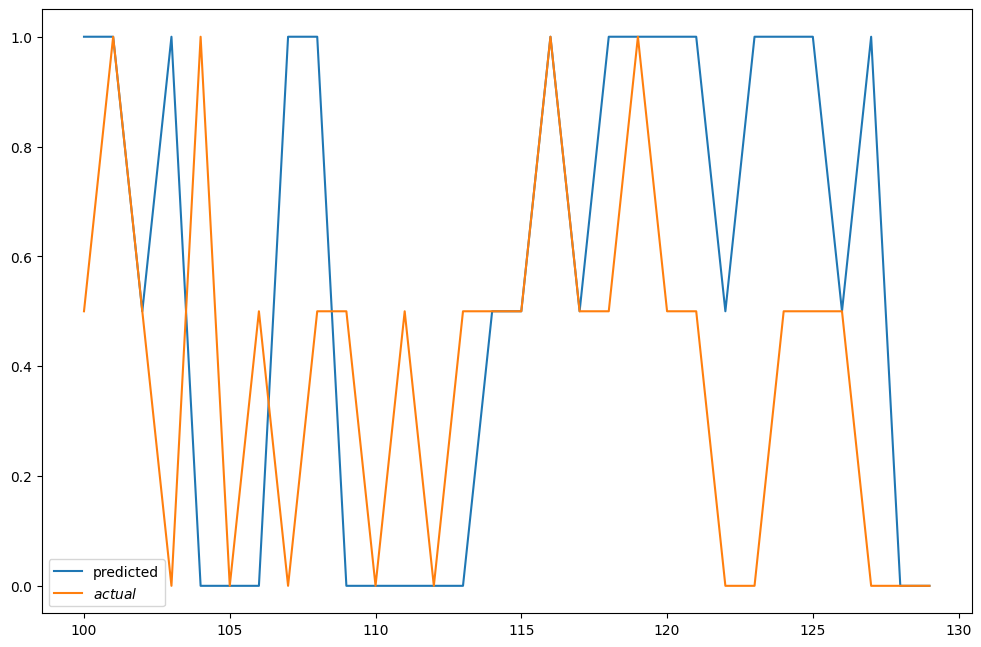

In [87]:

predictedScores, temp = similiarityTo(M, u, s, vh, 600, groups, labels, conjoinFunction=np.max)

score = df["label"]
fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=100)

b = 100
e = 130
x = np.arange(predictedScores.size)
ax.plot(x[b:e], predictedScores[b:e], label="predicted")
ax.plot(x[b:e], score[b:e], label="$actual$")
ax.legend()

error = np.sqrt(np.mean(np.power(score - predictedScores, 2)))
print(f"RMSE: {error}")
accWorst = np.sum(predictedScores[worsts] == score[worsts]) / worsts.size
accMeds = np.sum(predictedScores[mediums] == score[mediums]) / mediums.size
accBest = np.sum(predictedScores[bests] == score[bests]) / bests.size
print(f"Accuracy for [worst, med, best]: [{accWorst:.4f}, {accMeds:.4f}, {accBest:.4f}]")

# print(temp)

plt.show()


In [72]:
np.array([1, 2, 3])[:0]

array([], dtype=int32)

[[0.40453303 0.35691659 0.33319851]
 [0.35691659 0.33735271 0.3228592 ]
 [0.33319851 0.3228592  0.3246067 ]]


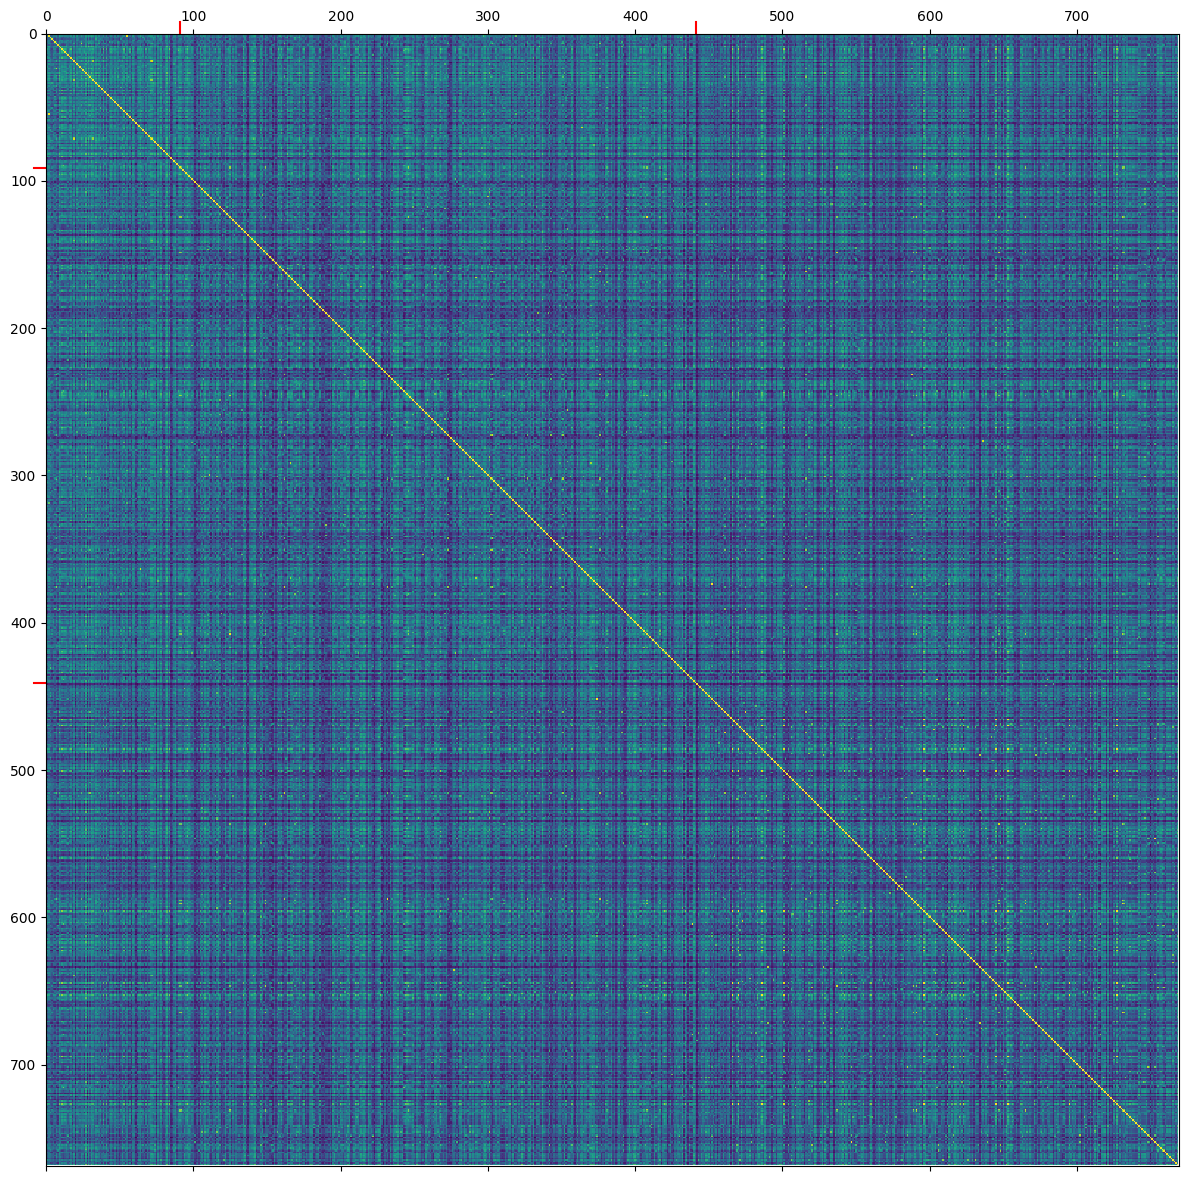

In [134]:
by = 10
Mhat = np.dot(u[:, :-by] * s[:-by], vh[:-by,:])

MhatNorm = np.copy(Mhat)
n0mask = ~(np.linalg.norm(MhatNorm, axis=1) == 0)
MhatNorm[n0mask] = np.divide(
    MhatNorm[n0mask],
    np.reshape(
        np.linalg.norm(MhatNorm[n0mask], axis=1),
        (-1, 1)
    )
)

sim = np.dot(MhatNorm, MhatNorm.T)
sim_b_b = sim[np.ix_(bests, bests)]
sim_b_m = sim[np.ix_(bests, mediums)]
sim_b_w = sim[np.ix_(bests, worsts)]
sim_m_b = sim[np.ix_(mediums, bests)]
sim_m_m = sim[np.ix_(mediums, mediums)]
sim_m_w = sim[np.ix_(mediums, worsts)]
sim_w_b = sim[np.ix_(worsts, bests)]
sim_w_m = sim[np.ix_(worsts, mediums)]
sim_w_w = sim[np.ix_(worsts, worsts)]

sim = np.block([
    [sim_b_b, sim_b_m, sim_b_w],
    [sim_m_b, sim_m_m, sim_m_w],
    [sim_w_b, sim_w_m, sim_w_w]
])

simVals = np.array([
    [np.mean(sim_b_b), np.mean(sim_b_m), np.mean(sim_b_w)],
    [np.mean(sim_m_b), np.mean(sim_m_m), np.mean(sim_m_w)],
    [np.mean(sim_w_b), np.mean(sim_w_m), np.mean(sim_w_w)]
])

xB = bests.size
xM = mediums.size + xB
ls = 8
lt = 1.5


print(simVals)

fig, ax = plt.subplots(1, 1, figsize=(15, 15), dpi=100)
ax.matshow(sim)
ax.set_xlim(0, sim.shape[0])
ax.set_ylim(sim.shape[0], 0)
ax.plot([xB, xB], [-ls, 0], clip_on=False, linewidth=lt, color="red")
ax.plot([-ls, 0], [xB, xB], clip_on=False, linewidth=lt, color="red")
ax.plot([xM, xM], [-ls, 0], clip_on=False, linewidth=lt, color="red")
ax.plot([-ls, 0], [xM, xM], clip_on=False, linewidth=lt, color="red")
plt.show()

In [111]:
ones = np.ones((3, 3)) * 1
twos = np.ones((3, 3)) * 2
threes = np.ones((3, 3)) * 3
fours = np.ones((3, 3)) * 4
fives = np.ones((3, 3)) * 5
sixes = np.ones((3, 3)) * 6

np.block([[ones, twos, threes], [fours, fives, sixes]])


array([[1., 1., 1., 2., 2., 2., 3., 3., 3.],
       [1., 1., 1., 2., 2., 2., 3., 3., 3.],
       [1., 1., 1., 2., 2., 2., 3., 3., 3.],
       [4., 4., 4., 5., 5., 5., 6., 6., 6.],
       [4., 4., 4., 5., 5., 5., 6., 6., 6.],
       [4., 4., 4., 5., 5., 5., 6., 6., 6.]])

# HDBSCAN

(926, 300) (926, 6900)


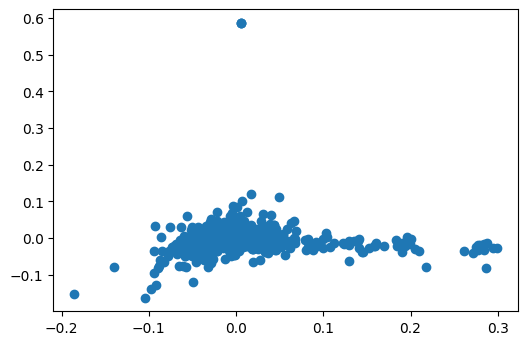

In [2]:
import hdbscan
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_json("./data/q_2_k_12.json")

x_mat = np.load("./data/12_cc_matrix.npy")
x_vec = np.load("./data/12_cc_vector.npy")

print(x_vec.shape, x_mat.shape)

pca = sklearn.decomposition.PCA(n_components=2)

x_vec_2d = pca.fit_transform(x_vec - np.mean(x_vec, axis=0))

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)

ax.scatter(x_vec_2d.T[0], x_vec_2d.T[1]) 
plt.show()

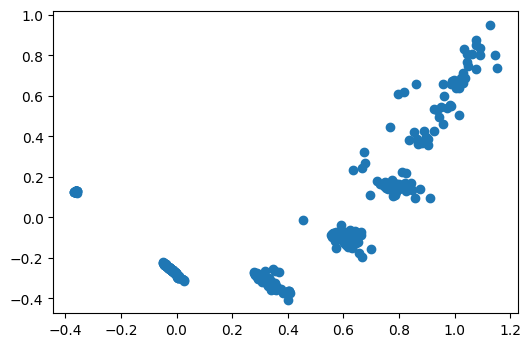

In [38]:
x_mat_2d = pca.fit_transform(x_mat - np.mean(x_mat, axis=0))

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)

ax.scatter(x_mat_2d.T[0], x_mat_2d.T[1]) 
plt.show()

In [3]:
from scipy import optimize

def cluster(args, x_mat, df):
    min_cluster_size, min_samples, cluster_selection_epsilon = args

    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=min_samples, 
        cluster_selection_epsilon=cluster_selection_epsilon
    )
    
    x_mat = np.load("./data/12_cc_matrix.npy")
    clusterer.fit(x_mat)

    groups = np.unique(clusterer.labels_)
    errors = []

    for label in groups:

        if label == -1:
            continue

        indices = np.where(clusterer.labels_ == label)
        group = df.loc[indices, "label"]
        errors.append(np.std(group))

    return np.mean(errors)


df = pd.read_json("./data/q_2_k_12.json")
x_mat = np.load("./data/12_cc_matrix.npy")
rranges = (slice(5, 120, 20), slice(5, 120, 20), slice(0.1, 0.9, 0.2))
resbrute = optimize.brute(cluster, rranges, workers=3, args=(x_mat, df))


Err: 0.5860261860188503


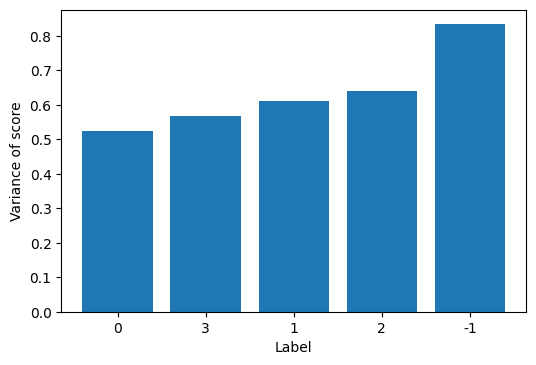

In [60]:

groups = np.unique(clusterer.labels_)
errors = []

for label in groups:
    indices = np.where(clusterer.labels_ == label)
    group = df.loc[indices, "label"]
    errors.append(np.std(group))

errors = np.array(errors)
sort_i = np.argsort(errors)

groups = groups[sort_i]
errors = errors[sort_i]

fig, ax = plt.subplots(1, 1, figsize =(6, 4), dpi = 100)
ax.bar(np.arange(groups.size), errors)
ax.set_xticks(np.arange(groups.size), groups)
ax.set_xlabel("Label")
ax.set_ylabel("Variance of score")
plt.plot()

print(f"Err: {np.mean(errors[groups != -1])}")


<AxesSubplot:ylabel='$\\lambda$ value'>

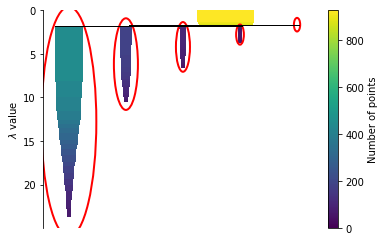

In [51]:
clusterer.condensed_tree_.plot(select_clusters=True)